<a href="https://colab.research.google.com/github/Tommmster/diplodatos-2022-g20/blob/main/entregable2_EyCD/EyCD_Entregable_Parte_1_g20_VersionFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Exploración y Curación de Datos**

*Edición 2022*

----

# Trabajo práctico entregable - parte 1

En esta notebook, vamos a cargar el conjunto de datos de [la compentencia Kaggle](https://www.kaggle.com/dansbecker/melbourne-housing-snapshot) sobre estimación de precios de ventas de propiedades en Melbourne, Australia.

Utilizaremos el conjunto de datos reducido producido por [DanB](https://www.kaggle.com/dansbecker). Hemos subido una copia a un servidor de la Universidad Nacional de Córdoba para facilitar su acceso remoto.

In [ ]:
import matplotlib.pyplot as plt
import numpy
import pandas

import seaborn
seaborn.set_context('talk')

#!pip install matplotlib-venn
!pip install decouple

#from decouple import config
from sqlalchemy import create_engine, text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import plotly
plotly.__version__
# Make sure it's 4.14.3

'5.5.0'

In [ ]:
# melb_data es un archivo que contiene las propiedades a aquilar con descripcion de las mismas , habitaciones, precio, vendedor , fecha 
melb_df = pandas.read_csv(
    'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv')


In [ ]:
melb_df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

## Ejercicio 1 SQL: 

1. Crear una base de datos en SQLite utilizando la libreria [SQLalchemy](https://stackoverflow.com/questions/2268050/execute-sql-from-file-in-sqlalchemy).
https://docs.sqlalchemy.org/en/14/core/engines.html#sqlite

2. Ingestar los datos provistos en 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv' en una tabla y el dataset generado en clase con datos de airbnb y sus precios por codigo postal en otra.

3. Implementar consultas en SQL que respondan con la siguiente información:

    - cantidad de registros totales por ciudad.
    - cantidad de registros totales por barrio y ciudad.

4. Combinar los datasets de ambas tablas ingestadas utilizando el comando JOIN de SQL  para obtener un resultado similar a lo realizado con Pandas en clase.  



## Ejercicio 2: 

1. Seleccionar un subconjunto de columnas que les parezcan relevantes al problema de predicción del valor de la propiedad. Justificar las columnas seleccionadas y las que no lo fueron.
 - Eliminar los valores extremos que no sean relevantes para la predicción de valores de las propiedades.

2. Agregar información adicional respectiva al entorno de una propiedad a partir del [conjunto de datos de AirBnB](https://www.kaggle.com/tylerx/melbourne-airbnb-open-data?select=cleansed_listings_dec18.csv) utilizado en el práctico. 
  1. Seleccionar qué variables agregar y qué combinaciones aplicar a cada una. Por ejemplo, pueden utilizar solo la columna `price`, o aplicar múltiples transformaciones como la mediana o el mínimo.
  1. Utilizar la variable zipcode para unir los conjuntos de datos. Sólo incluir los zipcodes que tengan una cantidad mínima de registros (a elección) como para que la información agregada sea relevante.
  2. Investigar al menos otras 2 variables que puedan servir para combinar los datos, y justificar si serían adecuadas o no. Pueden asumir que cuentan con la ayuda de anotadores expertos para encontrar equivalencias entre barrios o direcciones, o que cuentan con algoritmos para encontrar las n ubicaciones más cercanas a una propiedad a partir de sus coordenadas geográficas. **NO** es necesario que realicen la implementación.

Pueden leer otras columnas del conjunto de AirBnB además de las que están en `interesting_cols`, si les parecen relevantes.

## Ejercicio 3:

Crear y guardar un nuevo conjunto de datos con todas las transformaciones realizadas anteriormente.

## Ejercicios opcionales:

1. Armar un script en python (archivo .py) [ETL](https://towardsdatascience.com/what-to-log-from-python-etl-pipelines-9e0cfe29950e) que corra los pasos de extraccion, transformacion y carga, armando una funcion para cada etapa del proceso y luego un main que corra todos los pasos requeridos.

2. Armar un DAG en Apache Airflow que corra el ETL. (https://airflow.apache.org/docs/apache-airflow/stable/tutorial.html)

# Ejercicio 1 SQL *Resolucion*


*1. Crear una base de datos en SQLite*

In [ ]:
import pandas as pd
from sqlalchemy import create_engine, text

# crea una conexion a la base de datos BDCuracion
engine = create_engine('sqlite:///BDCuracion.db', echo=True)

2. *Ingestar los datos provistos en 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv' en una tabla y el dataset generado en clase con datos de airbnb y sus precios por codigo postal en otra.*

In [ ]:
melb_df.to_sql('melbourn', con=engine, if_exists="replace")

2022-06-24 10:51:09,177 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("melbourn")
2022-06-24 10:51:09,180 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-06-24 10:51:09,184 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("melbourn")
2022-06-24 10:51:09,187 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-06-24 10:51:09,192 INFO sqlalchemy.engine.Engine SELECT name FROM sqlite_master WHERE type='table' ORDER BY name
2022-06-24 10:51:09,195 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-06-24 10:51:09,198 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("melbourn")
2022-06-24 10:51:09,200 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-06-24 10:51:09,206 INFO sqlalchemy.engine.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type = 'table'
2022-06-24 10:51:09,210 INFO sqlalchemy.engine.Engine [raw sql] ('melbourn',)
2022-06-24 10:51:09,213 INFO sqlalchemy.engine.Engine PRAGMA main.foreign_key_list("melbo

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Aqui antes debemos subir el archivo generado en clase , el cual contiene los precios por codigos postal obtenido de la competencia de Kaggle
airbnb_df = pd.read_csv(
    '/content/airbnb_price_by_zipcode.csv')

In [ ]:
airbnb_df.to_sql('airbnb', con=engine, if_exists="replace")

2022-06-24 10:51:12,159 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("airbnb")
2022-06-24 10:51:12,163 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-06-24 10:51:12,167 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("airbnb")
2022-06-24 10:51:12,170 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-06-24 10:51:12,184 INFO sqlalchemy.engine.Engine SELECT name FROM sqlite_master WHERE type='table' ORDER BY name
2022-06-24 10:51:12,191 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-06-24 10:51:12,193 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("airbnb")
2022-06-24 10:51:12,198 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-06-24 10:51:12,203 INFO sqlalchemy.engine.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type = 'table'
2022-06-24 10:51:12,207 INFO sqlalchemy.engine.Engine [raw sql] ('airbnb',)
2022-06-24 10:51:12,213 INFO sqlalchemy.engine.Engine PRAGMA main.foreign_key_list("airbnb")
2022

3. *Implementar consultas en SQL que respondan con la siguiente información:
Cantidad de registros totales por ciudad. Cantidad de registros totales por barrio y ciudad.*

In [ ]:
query1 = 'SELECT COUNT(1) , CouncilArea FROM melbourn GROUP BY CouncilArea '
query2 = 'SELECT COUNT(1) ,  Suburb, CouncilArea FROM melbourn GROUP BY Suburb, CouncilArea '

queries = [query1, query2]

In [ ]:
with engine.connect() as con:
    for query in queries:
      rs = con.execute(query)
      print(query)
      for row in rs:
          print(row)

      print('\n\n')

2022-06-24 10:51:12,487 INFO sqlalchemy.engine.Engine SELECT COUNT(1) , CouncilArea FROM melbourn GROUP BY CouncilArea 
2022-06-24 10:51:12,493 INFO sqlalchemy.engine.Engine [raw sql] ()
SELECT COUNT(1) , CouncilArea FROM melbourn GROUP BY CouncilArea 
(1369, None)
(594, 'Banyule')
(489, 'Bayside')
(1160, 'Boroondara')
(424, 'Brimbank')
(8, 'Cardinia')
(38, 'Casey')
(934, 'Darebin')
(53, 'Frankston')
(848, 'Glen Eira')
(52, 'Greater Dandenong')
(434, 'Hobsons Bay')
(164, 'Hume')
(207, 'Kingston')
(80, 'Knox')
(7, 'Macedon Ranges')
(311, 'Manningham')
(692, 'Maribyrnong')
(80, 'Maroondah')
(470, 'Melbourne')
(66, 'Melton')
(333, 'Monash')
(997, 'Moonee Valley')
(1, 'Moorabool')
(1163, 'Moreland')
(36, 'Nillumbik')
(628, 'Port Phillip')
(719, 'Stonnington')
(1, 'Unavailable')
(304, 'Whitehorse')
(167, 'Whittlesea')
(86, 'Wyndham')
(647, 'Yarra')
(18, 'Yarra Ranges')



2022-06-24 10:51:12,526 INFO sqlalchemy.engine.Engine SELECT COUNT(1) ,  Suburb, CouncilArea FROM melbourn GROUP BY Subu

4. *Combinar los datasets de ambas tablas ingestadas utilizando el comando JOIN de SQL para obtener un resultado similar a lo realizado con Pandas en clase.*

In [ ]:
query3= 'SELECT Suburb, Address, Rooms, Type, Price, Method, SellerG,Date, Distance, Postcode, Bedroom2, Bathroom, Car,  Landsize, BuildingArea, YearBuilt, CouncilArea, Lattitude,  Longtitude, Regionname, Propertycount, zipcode, airbnb_price_mean, airbnb_record_count, airbnb_weekly_price_mean, airbnb_monthly_price_mean FROM melbourn  LEFT JOIN airbnb on melbourn.Postcode=airbnb.zipcode'

with engine.connect() as con:
      rs = con.execute(query3)
      print(query)
      for row in rs:
          print(row)

      print('\n\n')


Se truncaron las últimas líneas 5000 del resultado de transmisión.
('Brunswick East', '2 Barkly St', 3, 't', 800000.0, 'VB', 'Nelson', '18/06/2016', 4.5, 3057.0, 3.0, 3.0, 2.0, 0.0, None, None, 'Moreland', -37.7788, 144.9776, 'Northern Metropolitan', 5533.0, 3057.0, 154.43243243243242, 185, 595.8421052631579, 2789.6666666666665)
('Brunswick East', '41 Barkly St', 3, 'h', 1679000.0, 'S', 'Nelson', '19/11/2016', 4.5, 3057.0, 3.0, 2.0, 0.0, 326.0, 118.0, 1920.0, 'Moreland', -37.7776, 144.9751, 'Northern Metropolitan', 5533.0, 3057.0, 154.43243243243242, 185, 595.8421052631579, 2789.6666666666665)
('Brunswick East', '2/33 Linden St', 3, 't', 1050000.0, 'PI', 'Jellis', '19/11/2016', 4.5, 3057.0, 3.0, 3.0, 2.0, 87.0, 151.0, 1998.0, 'Moreland', -37.7739, 144.975, 'Northern Metropolitan', 5533.0, 3057.0, 154.43243243243242, 185, 595.8421052631579, 2789.6666666666665)
('Brunswick East', '15 Ethel St', 2, 'h', 957000.0, 'S', 'Nelson', '22/05/2016', 4.5, 3057.0, 2.0, 1.0, 1.0, 148.0, None, None, 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



# *Ejercicio 2 Resolucion*

 1. *Seleccionar un subconjunto de columnas que les parezcan relevantes al problema de predicción del valor de la propiedad. Justificar las columnas seleccionadas y las que no lo fueron.*
 
*-Eliminar los valores extremos que no sean relevantes para la predicción de valores de las propiedades.*

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('talk')
import plotly.express as px
import numpy
import pandas

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

%matplotlib inline

Nos debemos centrar en la tarea de estimar el precio de cada propiedad, para ellos debemos conocer las caracteristicas de las mismas y el primer paso a realizar es una exploración de los datos y las distribuciones de sus variables, concocer si estas variables tienen nulos o valor cero, si esto es esperable o no, a los fines de conocer si son validas o no para ser elegidas para mi data set. Se aclara lo siguiente:

|melb_df | Contiene los datos de Melbourn melb_data.csv|
|--------|---------------------------------|
|airbnb_df | Contiene los datos de Airbnb |


In [ ]:
#seteamos visualizacion 
pd.options.display.float_format = '{:.2f}'.format

pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [ ]:
melb_df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.00,13580.00,13580.00,13580.00,13580.00,13580.00,13518.00,13580.00,7130.00,8205.00,13580.00,13580.00,13580.00
mean,2.94,1075684.08,10.14,3105.30,2.91,1.53,1.61,558.42,151.97,1964.68,-37.81,145.00,7454.42
std,0.96,639310.72,5.87,90.68,0.97,0.69,0.96,3990.67,541.01,37.27,0.08,0.10,4378.58
min,1.00,85000.00,0.00,3000.00,0.00,0.00,0.00,0.00,0.00,1196.00,-38.18,144.43,249.00
25%,2.00,650000.00,6.10,3044.00,2.00,1.00,1.00,177.00,93.00,1940.00,-37.86,144.93,4380.00
50%,3.00,903000.00,9.20,3084.00,3.00,1.00,2.00,440.00,126.00,1970.00,-37.80,145.00,6555.00
75%,3.00,1330000.00,13.00,3148.00,3.00,2.00,2.00,651.00,174.00,1999.00,-37.76,145.06,10331.00
max,10.00,9000000.00,48.10,3977.00,20.00,8.00,10.00,433014.00,44515.00,2018.00,-37.41,145.53,21650.00


*Como se puede apreciar a primer instancia hay valores faltantes en algunas variables como YearBuild, BuildingArea, y en menor medida la variable Car. Vemos con valores en cero Bedrooms2, Bathroom, Car, Landsize y BuildingArea, tambien se observan valores no esperados en YearBuild. Estos datos puede haber sido por una mala recoleccion de datos, o falta de datos.*
*Recordemos que tenemos 13580 casos, por lo cual hay variables con una cantidad muy chica de ceros, y otras con una cantidad importante. La pregunta a responder es: Son estos ceros valores posibles de la variable o datos faltantes codificados asi?.*

*Parece que hay variables con valores faltantes, que han sido reconocidos por pandas como NaN, y valores 0 que podrían ser tambien datos faltantes.*


*En esta muestra vemos las variables Landsize, BuildingArea, YearBuilt. con problemas potenciales*

*Landsize tiene valores 0.*

*BuildingArea y YearBuilt tienen NaN*

In [ ]:
cols = melb_df[melb_df == 0].count(axis=0)
cols[cols > 0]

Distance           6
Bedroom2          16
Bathroom          34
Car             1026
Landsize        1939
BuildingArea      17
dtype: int64

*Vamos a trabajar con las variables Rooms, Bathroom, Car, Type, Regionname, BuildingArea, Method, Landsize, relacionada con la variable a predecir Price. Pero antes miremos aquellas variables que describen la propiedad por si misma, de acuerdo a sus caracteristicas y considerando algunos aspectos esperados, por ejemplo si el tipo de casa es h(house) se espera que tenga por lo menos 1 baño (bathroom), dormitorio (bedroom2) , 1 ambiente(rooms).*

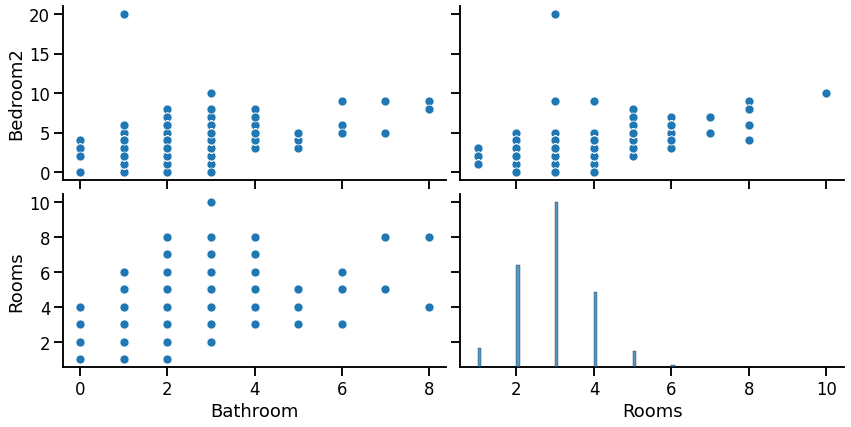

In [ ]:
seaborn.pairplot(data=melb_df,
                 y_vars=['Bedroom2', 'Rooms'],
                 x_vars=['Bathroom', 'Rooms'],
                 aspect=2, height=3)

*Se puede observar un caso con 20 bedrooms, 1 bathroom y 3 rooms, lo cual es poco probable que sea asi, este caso nos estaria generando ruido.*

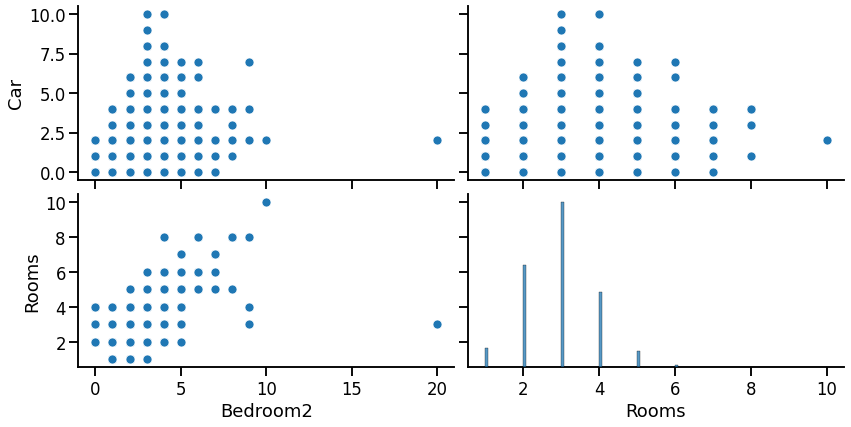

In [ ]:
#airbnb_df --> contien informacion del archivo airbnb_price_by_zipcode  
#df_melbourn --> contiene informacion de melbourn
seaborn.pairplot(data=melb_df,
                 y_vars=['Car', 'Rooms'],
                 x_vars=['Bedroom2', 'Rooms'],
                 aspect=2, height=3)


*Se puede observar que para Bedroom2 tiene un caso con valor 20 con 2 cocheras y 3 rooms lo cual no es algo razonable, considerando que dicho dato fue obtenido a traves de otra fuente de datos, lo cual puede tener algun tipo de sesgo, por este motivo se dejara de lado esta variable del estudio de prediccion del precio.*

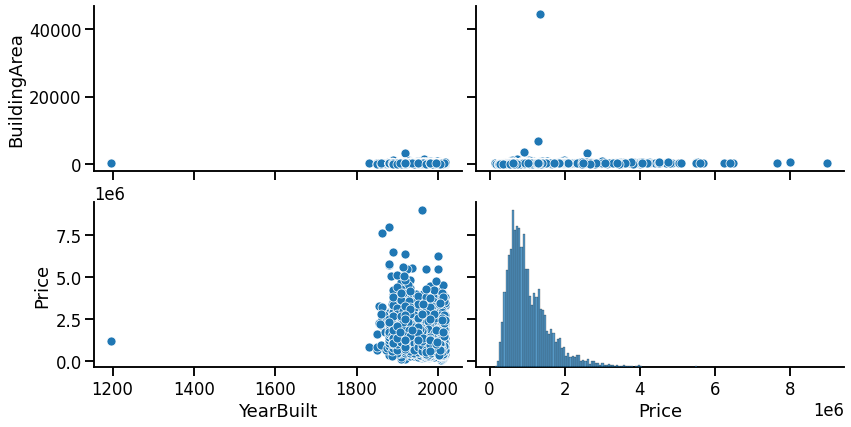

In [ ]:

seaborn.pairplot(data=melb_df,
                 y_vars=['BuildingArea', 'Price'],
                 x_vars=['YearBuilt', 'Price'],
                 aspect=2, height=3)

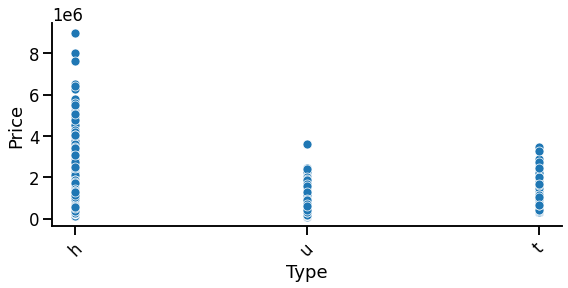

In [ ]:
seaborn.pairplot(data=melb_df, y_vars=['Price'],
                 x_vars=['Type'],
                 aspect=2, height=4)
plt.xticks(rotation=45);

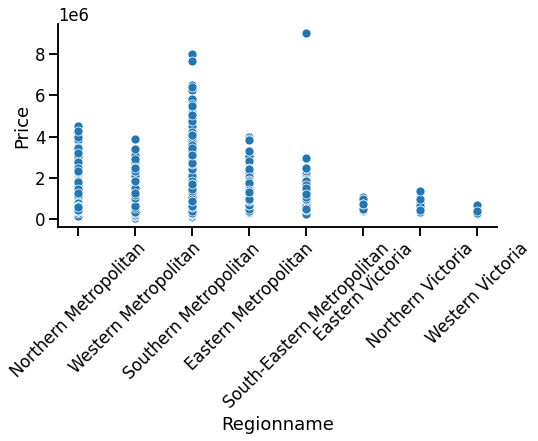

In [ ]:
seaborn.pairplot(data=melb_df, y_vars=['Price'],
                 x_vars=['Regionname'],
                 aspect=2, height=4)
plt.xticks(rotation=45);

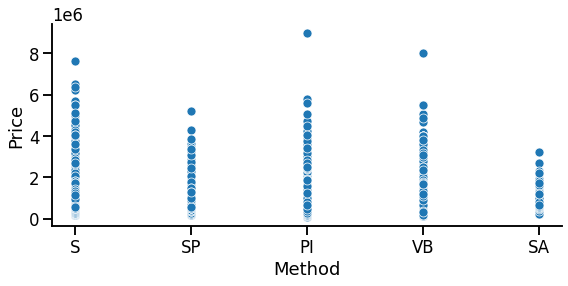

In [ ]:
seaborn.pairplot(data=melb_df, y_vars=['Price'],
                 x_vars=['Method'],
                 aspect=2, height=4)


*De las columnas analizadas podemos concluir lo siguiente:
Se considera que aquellas variables que informan sobre las caracteristicas del inmueble: Bedroom2, car, Rooms, Bathrooms son relevantes para el analisis de prediccion del Precio, dado que segun las graficas observadas puede apreciarse su distribucion es bastante razonable.
Con respecto a la variable Type tambien segun las graficas realizadas se observa que es relevante para el analisis de prediccion por lo que se las incluira en el dataset.*
*Por otro lado se observan valores no razonables de la variable bedroom2, mientras que para las variables Address, Propertycount, Method , SellerG, Date , Distance y Regionname no se consideran relevantes para el analisis por lo cual seran eliminadas del set de datos.*


In [ ]:
melb_df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [ ]:
# se eliminara la columna bedroom2, date, Address , SellerG, Date, Regionname, Propertycount previamente se efectuara una copia del dataframe.

melb_df_bkp = melb_df.copy(deep=True)

#melb_df=melb_df.drop('Bedroom2',axis=1)
melb_df = melb_df.drop(['Bedroom2','Address','Method', 'SellerG','Date','Distance','Regionname', 'Propertycount'], axis=1) 



In [ ]:
melb_df.columns , melb_df.shape

(Index(['Suburb', 'Rooms', 'Type', 'Price', 'Postcode', 'Bathroom', 'Car',
        'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
        'Longtitude'],
       dtype='object'), (13580, 13))

2. Agregar información adicional respectiva al entorno de una propiedad a partir del [conjunto de datos de AirBnB](https://www.kaggle.com/tylerx/melbourne-airbnb-open-data?select=cleansed_listings_dec18.csv) utilizado en el práctico. 
  1. Seleccionar qué variables agregar y qué combinaciones aplicar a cada una. Por ejemplo, pueden utilizar solo la columna `price`, o aplicar múltiples transformaciones como la mediana o el mínimo.
  1. Utilizar la variable zipcode para unir los conjuntos de datos. Sólo incluir los zipcodes que tengan una cantidad mínima de registros (a elección) como para que la información agregada sea relevante.
  2. Investigar al menos otras 2 variables que puedan servir para combinar los datos, y justificar si serían adecuadas o no. Pueden asumir que cuentan con la ayuda de anotadores expertos para encontrar equivalencias entre barrios o direcciones, o que cuentan con algoritmos para encontrar las n ubicaciones más cercanas a una propiedad a partir de sus coordenadas geográficas. **NO** es necesario que realicen la implementación.

1. *Analizamos las variables dadas en el archivo de AirBnB consideramos las mas relavantes:*

In [ ]:

interesting_cols = [
  'description', 'neighborhood_overview',
  'street', 'neighborhood', 'city', 'suburb', 'state', 'zipcode',
  'price', 'weekly_price', 'monthly_price',
  'latitude', 'longitude','property_type', 'bathrooms', 'bedrooms', 'amenities'
]



In [ ]:
df_airbnb_adic = pandas.read_csv(
    'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/cleansed_listings_dec18.csv',
    usecols=interesting_cols)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning:

Columns (35) have mixed types.Specify dtype option on import or set low_memory=False.



In [ ]:
len(df_airbnb_adic)

22895

In [ ]:
df_airbnb_adic.zipcode.value_counts()[:5]

3000.0    2491
3000       876
3006.0     860
3182.0     579
3182       556
Name: zipcode, dtype: int64

 Sin embargo, este zipcode tiene tipos diferentes, que tendremos que estandarizar antes de continuar con la combinación de los dato

In [ ]:
df_airbnb_adic['zipcode'] = pandas.to_numeric(df_airbnb_adic.zipcode, errors='coerce')

In [ ]:
df_airbnb_adic.zipcode.value_counts()

3000.00     3367
3006.00     1268
3182.00     1135
3141.00      881
3004.00      728
            ... 
3785.00        1
3096.00        1
30122.00       1
3912.00        1
4068.00        1
Name: zipcode, Length: 247, dtype: int64

de esta forma unificamos el formato del campo zipcode. Y lo que necesitamos realizar es la relacion entre el df_melbourn y el df_airbnb_adic a traves de este campo, pero primero debemos verificar que los codigos postales correspondan a la misma zona. Para ello primero realizaremos la interseccion  y realizamos un analisis al respecto:

In [ ]:
# buscamos la intersecion de los 248 valores de AIRBNB 191 tambien estan en melb 
intersection = numpy.intersect1d(
    df_airbnb_adic.zipcode.values, melb_df.Postcode.values, assume_unique=False)
print("Airbnb unique zipcodes", len(df_airbnb_adic.zipcode.unique()))
print("Sales unique zipcodes", len(melb_df.Postcode.unique()))
print("Common zipcodes", len(intersection))

Airbnb unique zipcodes 248
Sales unique zipcodes 198
Common zipcodes 191


como se puede apreciar hay 248 valores de zipcode distintos  en airbnb y en el df melborn hay 198 y  a su vez hay 191 comunes en ambos dataframe.

In [ ]:
print('Records in Sales df with corresponding zipcode form Airbnb df',
      melb_df.Postcode.isin(intersection).sum() / len(melb_df))
print('Records in Airbnb df with corresponding zipcode form Sales df',
      df_airbnb_adic.zipcode.isin(intersection).sum() / len(df_airbnb_adic))

Records in Sales df with corresponding zipcode form Airbnb df 0.9985272459499264
Records in Airbnb df with corresponding zipcode form Sales df 0.9302904564315353


Se puede observar que hay un 99%  estan en la interseccion , no asi de los que estan en el dataframe de Airbnb. Podemos ver esto en forma visual de la forma:

Observamos que podemos agregar como datos: el promedio de precio semanal, promedio de precio mensual.

In [ ]:
relevant_cols = ['price', 'weekly_price', 'monthly_price']

In [ ]:

df_airbnb_adic[relevant_cols + ['zipcode']].groupby('zipcode').mean().reset_index()[:5]

,zipcode,price,weekly_price,monthly_price
0,2010.00,40.00,NaN,NaN
1,2134.00,50.00,NaN,NaN
2,2582.00,104.00,NaN,NaN
3,3000.00,150.50,918.74,3407.20
4,3001.00,132.50,NaN,NaN


In [ ]:
# Agregamos algunas columnas relevantes 
relevant_cols = ['price', 'weekly_price', 'monthly_price', 'zipcode', 'street', 'neighborhood', 'city','suburb']#, 'state', 'latitute', 'longitude']

airbnb_price_by_zipcode = df_airbnb_adic[relevant_cols].groupby('zipcode')\
  .agg({'price': ['mean', 'count'], 'weekly_price': 'mean',
        'monthly_price': 'mean', 'street': 'count', 'neighborhood': 'count', 'city': 'count','suburb': 'count'})\
  .reset_index()

In [ ]:
airbnb_price_by_zipcode

zipcode  price       weekly_price monthly_price street neighborhood  \
               mean count         mean          mean  count        count   
0    2010.00  40.00     1          NaN           NaN      1            1   
1    2134.00  50.00     1          NaN           NaN      1            1   
2    2582.00 104.00     1          NaN           NaN      1            0   
3    3000.00 150.50  3367       918.74       3407.20   3367         3259   
4    3001.00 132.50     2          NaN           NaN      2            2   
..       ...    ...   ...          ...           ...    ...          ...   
242  7367.00 230.00     1          NaN           NaN      1            0   
243  8938.00 296.00     1          NaN           NaN      1            1   
244  9004.00 226.00     1          NaN           NaN      1            0   
245  9540.00 245.00     1          NaN           NaN      1            1   
246 30122.00  75.00     1       525.00       2281.00      1            1   

     city suburb  
    count  count  
0       1      1  
1       1      1  
2       1      1  
3    3367   3366  
4       2      2  
..    ...    ...  
242     1      1  
243     1      1  
244     1      1  
245     1      1  
246     1      1  

[247 rows x 9 columns]

 2. Utilizar la variable zipcode para unir los conjuntos de datos. Sólo incluir los zipcodes que tengan una cantidad mínima de registros (a elección) como para que la información agregada sea relevante.

In [ ]:
# Flatten the two level columns
airbnb_price_by_zipcode.columns = [
  ' '.join(col).strip()
  for col in airbnb_price_by_zipcode.columns.values]
# Rename columns
airbnb_price_by_zipcode = airbnb_price_by_zipcode.rename(
    columns={'price mean': 'airbnb_price_mean',
             'price count': 'airbnb_record_count',
             'weekly_price mean': 'airbnb_weekly_price_mean',
             'monthly_price mean': 'airbnb_monthly_price_mean'}
)
airbnb_price_by_zipcode[:3]

,zipcode,airbnb_price_mean,airbnb_record_count,airbnb_weekly_price_mean,airbnb_monthly_price_mean,street count,neighborhood count,city count,suburb count
0,2010.00,40.00,1,NaN,NaN,1,1,1,1
1,2134.00,50.00,1,NaN,NaN,1,1,1,1
2,2582.00,104.00,1,NaN,NaN,1,0,1,1


In [ ]:
# ahora hacemos la interseccion en pandas

merged_sales_df = melb_df.merge(
    airbnb_price_by_zipcode, how='left',
    left_on='Postcode', right_on='zipcode')


In [ ]:
merged_sales_df.columns , merged_sales_df.shape

(Index(['Suburb', 'Rooms', 'Type', 'Price', 'Postcode', 'Bathroom', 'Car',
        'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
        'Longtitude', 'zipcode', 'airbnb_price_mean', 'airbnb_record_count',
        'airbnb_weekly_price_mean', 'airbnb_monthly_price_mean', 'street count',
        'neighborhood count', 'city count', 'suburb count'],
       dtype='object'), (13580, 22))

In [ ]:
# solo dejaremos las columnas mas relevantes
#'zipcode','street count','Propertycount','airbnb_record_count','neighborhood count','suburb count','city count'

#melb_df=melb_df.drop('Bedroom2',axis=1)
merged_sales_df_bck= merged_sales_df.copy(deep=True)

merged_sales_df = merged_sales_df.drop(['zipcode', 'airbnb_record_count','street count','neighborhood count', 'city count','suburb count'], axis=1) 



In [ ]:
merged_sales_df.columns , merged_sales_df.shape

(Index(['Suburb', 'Rooms', 'Type', 'Price', 'Postcode', 'Bathroom', 'Car',
        'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
        'Longtitude', 'airbnb_price_mean', 'airbnb_weekly_price_mean',
        'airbnb_monthly_price_mean'],
       dtype='object'), (13580, 16))

  3. Investigar al menos otras 2 variables que puedan servir para combinar los datos, y justificar si serían adecuadas o no. Pueden asumir que cuentan con la ayuda de anotadores expertos para encontrar equivalencias entre barrios o direcciones, o que cuentan con algoritmos para encontrar las n ubicaciones más cercanas a una propiedad a partir de sus coordenadas geográficas. **NO** es necesario que realicen la implementación.


Para seleccionar columnas candidatas que sirvan para combinar ambos conjuntos de datos podemos plantear los siguientes criterios

Agrupar por variables estructurales. Por ejemplo, cantidad de habitaciones o baños

Agrupar por ubicación dentro del área urbana, como ser suburbio o barrio

Agregar por espacio para estacionar. Si bien no existe explícitamente en el conjunto de datos de airbnb, si se puede derivar a partir de la columna amenities

Por areas poligonales definidas en un catálogo. A partir de los valores de latitud y longitud (disponibles en ambos conjuntos de datos) se puede evaluar la pertenencia de la propiedad dentro de un area arbitraria.

Finalmente tomamos las columas que indican
* Cantidad de baños (`Bathroom` / `bathrooms`)
* Ubicación de la propiedad (`Suburb` / `street`)

La justificación se basa en que se analizan dimensiones distintas de cada propiedad, y que existe una correlación entre la cantidad de baños y otros parametros de una casa o departamento.

#### Por ubicación

Se puede hacer una correspondencia entre los valores la columna `Suburb` del conjunto de datos `melb_df` y un subconjunto de los presentes en la columna `street` del conjunto de datos `airbnb_df`

In [ ]:
melb_df.Suburb.value_counts()

Reservoir         359
Richmond          260
Bentleigh East    249
Preston           239
Brunswick         222
                 ... 
Sandhurst           1
Bullengarook        1
Croydon South       1
Montrose            1
Monbulk             1
Name: Suburb, Length: 314, dtype: int64

In [ ]:
df_airbnb_adic.columns

Index(['description', 'neighborhood_overview', 'street', 'neighborhood',
       'city', 'suburb', 'state', 'zipcode', 'latitude', 'longitude',
       'property_type', 'bathrooms', 'bedrooms', 'amenities', 'price',
       'weekly_price', 'monthly_price'],
      dtype='object')

In [ ]:
df_airbnb_adic[df_airbnb_adic.street.str.contains('Melbourne')].street.value_counts()

Melbourne, VIC, Australia                            4222
North Melbourne, VIC, Australia                       340
South Melbourne, VIC, Australia                       284
West Melbourne, VIC, Australia                        262
Port Melbourne, VIC, Australia                        253
East Melbourne, VIC, Australia                        191
Melbourne , VIC, Australia                             30
Melbourne, Australia                                    9
Victoria, Melbourne, Australia                          6
Brighton East, Melbourne, VIC, Australia                4
Fitzroy, Melbourne, VIC, Australia                      3
Melbourne City, VIC, Australia                          3
Elwood, Melbourne, VIC, Australia                       3
Melbourne, Victoria, AU, VIC, Australia                 3
Melbourne, Vic, Australia                               3
Port Melbourne, Australia                               3
Melbourne , Vic, Australia                              2
Melbourne , vi

#### Columna candidata: Tipo de propiedad

Ambos conjuntos de datos tienen una columna que indica el tipo de propiedad. 

In [ ]:
df_airbnb_adic.property_type.value_counts()

Apartment                 12469
House                      5967
Townhouse                  1434
Condominium                 544
Serviced apartment          500
Villa                       326
Guesthouse                  276
Bed and breakfast           263
Guest suite                 260
Loft                        191
Cottage                     157
Bungalow                    157
Other                        49
Cabin                        46
Boutique hotel               44
Farm stay                    43
Hostel                       32
Tiny house                   25
Camper/RV                    16
Aparthotel                   12
Hotel                        11
Campsite                     10
Earth house                  10
Tent                          9
Nature lodge                  8
Boat                          8
Resort                        6
Barn                          5
Chalet                        4
Castle                        4
Hut                           3
Treehous

In [ ]:
melb_df.Type.value_counts()

h    9449
u    3017
t    1114
Name: Type, dtype: int64

#### Columna candidata : Baños

In [ ]:
df_airbnb_adic.bathrooms.value_counts()

1.00     16568
2.00      3681
1.50      1290
2.50       657
3.00       324
3.50       110
0.50        81
4.00        70
5.00        34
0.00        31
4.50        11
6.00         6
5.50         6
7.00         2
6.50         2
8.00         1
14.00        1
9.00         1
7.50         1
10.00        1
Name: bathrooms, dtype: int64

In [ ]:
melb_df.Bathroom.value_counts()

1.00    7512
2.00    4974
3.00     917
4.00     106
0.00      34
5.00      28
6.00       5
7.00       2
8.00       2
Name: Bathroom, dtype: int64

Si bien las distribuciones no son exactamente iguales (y deben curarse los casos donde figuran fracciones de baños), esta columna es una buena candidata ya que ambas variables presentan una distribución similar

In [ ]:
melb_df.Bathroom.describe()

count   13580.00
mean        1.53
std         0.69
min         0.00
25%         1.00
50%         1.00
75%         2.00
max         8.00
Name: Bathroom, dtype: float64

In [ ]:
df_airbnb_adic.bathrooms.describe()

count   22878.00
mean        1.29
std         0.58
min         0.00
25%         1.00
50%         1.00
75%         1.50
max        14.00
Name: bathrooms, dtype: float64

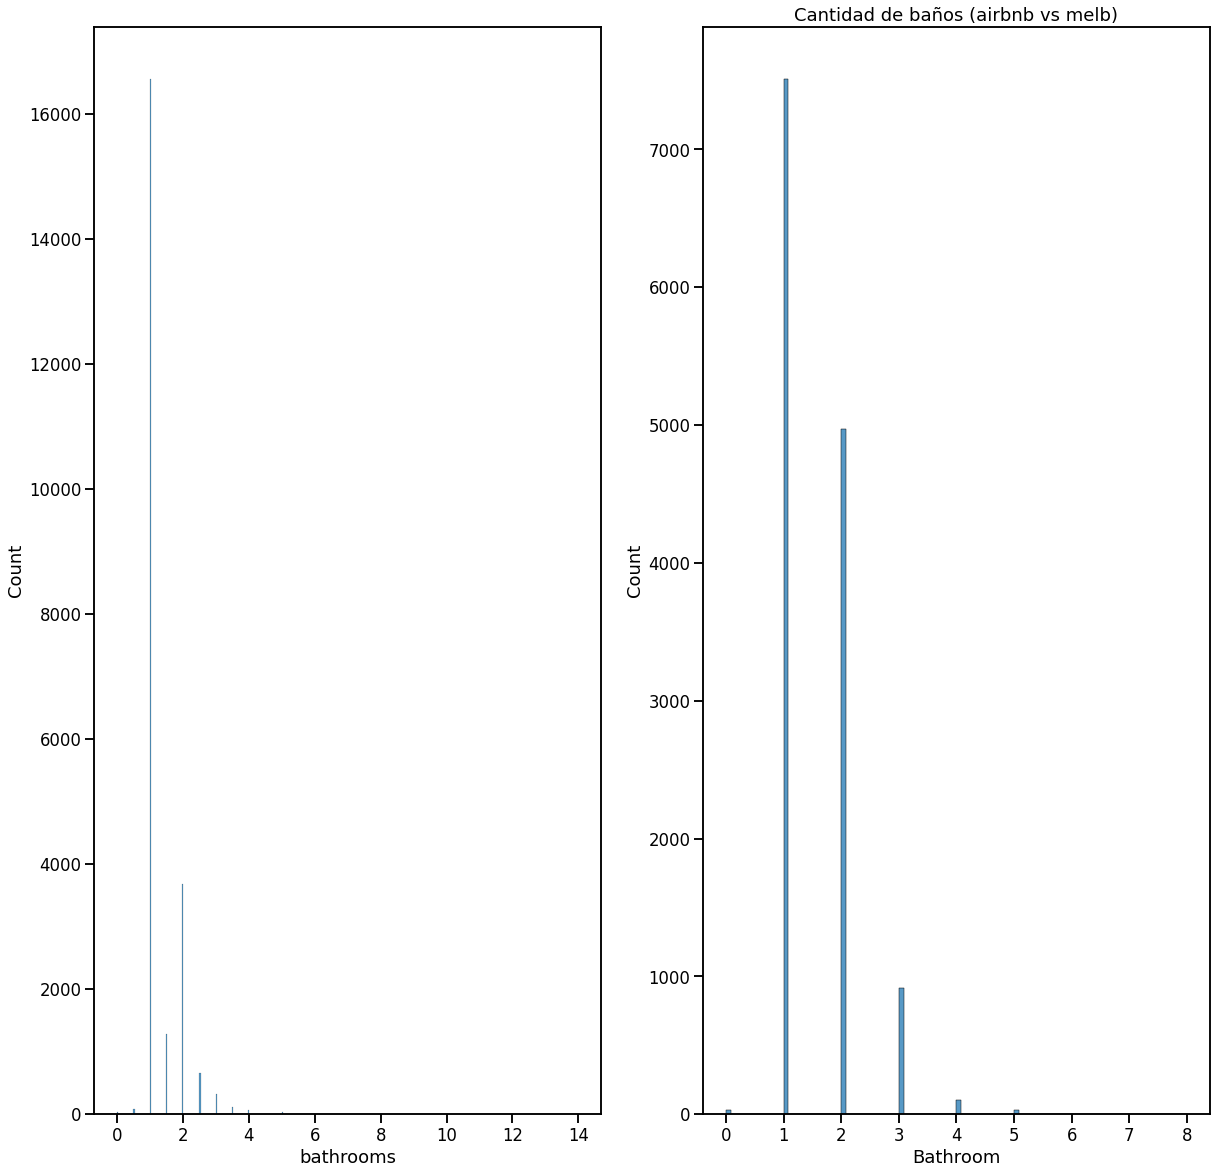

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 20))
plt.title('Cantidad de baños (airbnb vs melb)')

seaborn.histplot(data = df_airbnb_adic, x='bathrooms', ax=ax1)
seaborn.histplot(data = melb_df, x='Bathroom', ax=ax2)

# Columna candidata: Espacio para estacionar
Mas de `2/3` de las propiedades en el conjunto de datos de airbnb contienen espacio para estacionar

In [ ]:
def naive_parking_detector(s):
  """
  Naive check to validate if an airbnb property includes parking space.
  It assumes that the word 'parking' is not preceded or followed by a negative
  modifier, such as 'no parking' or 'parking forbidden'. 
  Also, performance is not considered as a factor.
  """
  r = s.replace("{", "").replace("}", "")\
  .replace('"','').lower()

  return 'parking' in r.lower()

df_airbnb_adic['car'] = df_airbnb_adic.amenities.apply(naive_parking_detector)
df_airbnb_adic.car.value_counts()

True     16815
False     6080
Name: car, dtype: int64

En el conjunto de datos de Melbourne, la proporción es aún mas alta.

In [ ]:
print(len(merged_sales_df))
len(melb_df[merged_sales_df.Car > 0])

13580


12492

Se observa que en el dato Garage, Car hay valores nulos, y el porcentaje de casos con datos faltantes es pequeño, se elimina el caso completo. 

In [ ]:
missing_values_count=merged_sales_df['Car'].isnull().sum()
Proporcion = missing_values_count/len(melb_df)
print('Proporcion de Nulos de Car: ', Proporcion)


Proporcion de Nulos de Car:  0.004565537555228277


In [ ]:
merged_sales_df= merged_sales_df.dropna(subset=['Car']) #,how='any',inplace=True)

In [ ]:
missing_values_count=merged_sales_df.isnull().sum()
missing_values_count

Suburb                          0
Rooms                           0
Type                            0
Price                           0
Postcode                        0
Bathroom                        0
Car                             0
Landsize                        0
BuildingArea                 6417
YearBuilt                    5344
CouncilArea                  1307
Lattitude                       0
Longtitude                      0
airbnb_price_mean              20
airbnb_weekly_price_mean      872
airbnb_monthly_price_mean    1265
dtype: int64

In [ ]:
merged_sales_df.to_csv("melb_data_extended.csv", index=None)
from google.colab import files
files.download('melb_data_extended.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>